## Imports

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [57]:
df = pd.read_csv("../data/_202107291244210_unemployment-rate-by-state-1982-to-2020-malaysia.csv")
df.head()

,Year,State/Country,Unemployment Rate (Percentage)
0,2020,Malaysia,4.5
1,2020,Johor,3.5
2,2020,Kedah,4.2
3,2020,Kelantan,4.3
4,2020,Melaka,2.2


In [58]:
def rename_state(state_name):
    if state_name == "W.P Kuala Lumpur":
        return "W.P. Kuala Lumpur"
    elif state_name == "W.P Putrajaya":
        return "W.P. Putrajaya"
    elif state_name == "W.P Labuan":
        return "W.P. Labuan"
    else:
        return state_name

In [59]:
df = df[df["Year"] == 2020]
df = df.drop(df[df["State/Country"] == "Malaysia"].index)
df = df.drop("Year", axis=1)
df = df.rename(columns={
    "State/Country": "State",
    " Unemployment Rate (Percentage) ": "Unemployment Rate"
})
df["State"] = df["State"].map(rename_state)
df

,State,Unemployment Rate
1,Johor,3.5
2,Kedah,4.2
3,Kelantan,4.3
4,Melaka,2.2
5,Negeri Sembilan,3.8
6,Pahang,3.1
7,Pulau Pinang,3.5
8,Perak,4.8
9,Perlis,4.3
10,Selangor,4.3


In [60]:
df_ordered = df.sort_values("Unemployment Rate")
df_ordered

,State,Unemployment Rate
16,W.P. Putrajaya,1.5
4,Melaka,2.2
6,Pahang,3.1
1,Johor,3.5
7,Pulau Pinang,3.5
5,Negeri Sembilan,3.8
14,W.P. Kuala Lumpur,4.0
11,Terengganu,4.1
2,Kedah,4.2
3,Kelantan,4.3


## Horizontal Lollipop Plot

Reference: [Python Graph Gallery](https://www.python-graph-gallery.com/182-vertical-lollipop-plot)

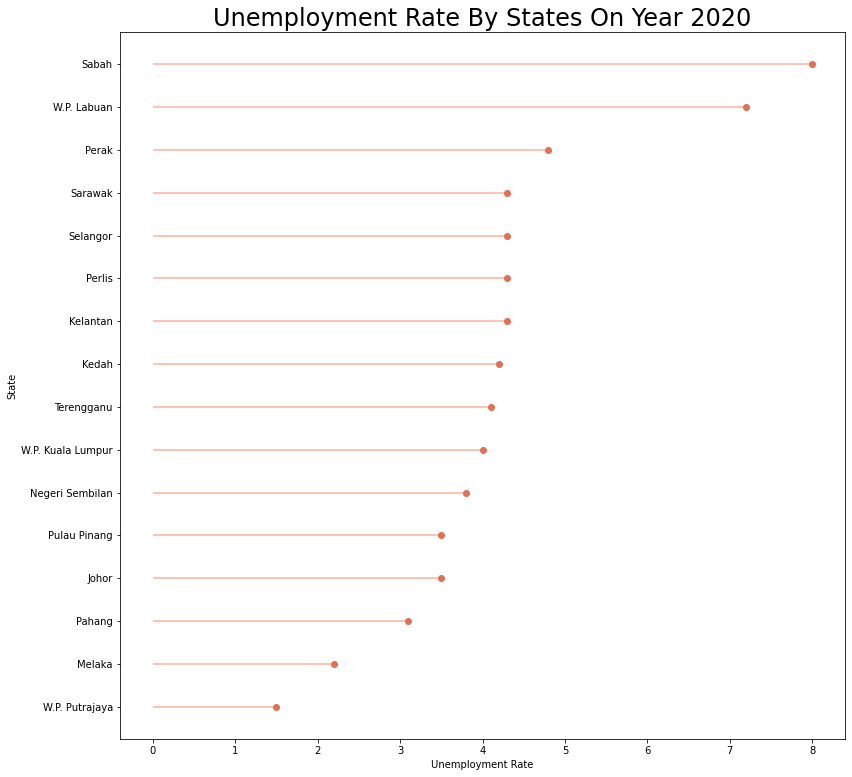

In [61]:
plt.figure(figsize=(13, 13))

plt.hlines(
    y=range(0,len(df_ordered.index)),
    xmin=0,
    xmax=df_ordered["Unemployment Rate"],
    color='#fab1a0'
)
plt.plot(
    df_ordered["Unemployment Rate"],
    range(0,len(df_ordered.index)),
    "o",
    color="#e17055"
)

plt.yticks(range(0,len(df_ordered.index)), df_ordered["State"])
plt.title("Unemployment Rate By States On Year 2020", size=24)
plt.xlabel('Unemployment Rate')
plt.ylabel('State')

plt.savefig("../visualizations/unemployment-lollipop.png")
plt.show()